In [72]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [73]:
fig_size = plt.rcParams["figure.figsize"]

In [74]:
fig_size

[20.0, 3.0]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [76]:
train_df = pd.read_csv('./cli_train.tsv',sep='\t')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 11 columns):
일자             20010 non-null int64
time           20010 non-null object
식사내용           20010 non-null object
매출일자           20010 non-null float64
수량             20010 non-null float64
일시             20010 non-null object
평균기온(°C)       20010 non-null float64
최저기온(°C)       20010 non-null float64
최고기온(°C)       20010 non-null float64
강수 계속시간(hr)    20010 non-null float64
일강수량(mm)       20010 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.7+ MB


In [77]:
time_dummy = pd.get_dummies(train_df['time'])

In [78]:
train_df = pd.concat([train_df, time_dummy],axis=1)

In [79]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [80]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:])
    day = datetime(y, m, d)
    return day.weekday()

In [81]:
train_df['month'] = train_df['일자'].apply(lambda x:int(str(x)[4:6]))
train_df['day'] = train_df['일자'].apply(lambda x:int(str(x)[6:]))
train_df['week'] = train_df['일자'].apply(date2week)
train_df['week'] = train_df['week'] + 1 
train_df['year'] = train_df['일자'].apply(lambda x:int(str(x)[:4]))

In [82]:
train_df['day_coord'] = train_df['day'].apply(date2coord, args=(sin_day, cos_day,))
train_df['month_coord'] = train_df['month'].apply(date2coord, args=(sin_month, cos_month))
train_df['week_coord'] = train_df['week'].apply(date2coord, args=(sin_week, cos_week,))

In [83]:
x_list = []

In [84]:
X_arr = pd.get_dummies(train_df['year']).values
x_list.append(X_arr)

In [85]:
X_arr = np.array(train_df['day_coord'].apply(lambda x:np.array(x)).tolist())
x_list.append(X_arr)

In [86]:
X_arr = np.array(train_df['month_coord'].apply(lambda x:np.array(x)).tolist())
x_list.append(X_arr)

In [87]:
X_arr = np.array(train_df['week_coord'].apply(lambda x:np.array(x)).tolist())
x_list.append(X_arr)

In [88]:
X_arr = train_df['아침'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['점심'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['점심2'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['저녁'].values.reshape(-1,1)
x_list.append(X_arr)

In [89]:
X_arr = train_df['평균기온(°C)'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['최저기온(°C)'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['최고기온(°C)'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['강수 계속시간(hr)'].values.reshape(-1,1)
x_list.append(X_arr)
X_arr = train_df['일강수량(mm)'].values.reshape(-1,1)
x_list.append(X_arr)

In [90]:
X_arr.shape

(20010, 1)

In [91]:
from konlpy.tag import Twitter
twitter = Twitter()

In [92]:
# from sklearn.feature_extraction.text import CountVectorizer
# def tokenize(text):
#     return text.split()
# vectorizer = CountVectorizer(tokenizer=tokenize)

In [93]:
doc_list = train_df['식사내용'].apply(lambda x: ' '.join(x[:-1].split(','))).tolist()

In [94]:
#doc_list = train_df['식사내용'].apply(lambda x: ' '.join(twitter.morphs(' '.join(x[:-1].split(','))))).tolist()

In [95]:
doc_list[0]

'과일샐러드 닭죽 돈육마늘장조림 떡만두국 부추김무침 쌀밥 딸기잼(중) 비엔나구이 스크램블에그(경양식) 야채샐러드 크림스프(경양식) 토스트&모닝빵'

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [97]:
X_food = vectorizer.fit_transform(doc_list)

print(X_food.shape)

(20010, 1835)


In [98]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [99]:
svd = TruncatedSVD(n_components=1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd,normalizer)

In [100]:
X_lsa = lsa.fit_transform(X_food)
exp_var = svd.explained_variance_ratio_.sum()
print(X_lsa.shape, exp_var)

(20010, 1000) 0.956236078542


In [101]:
X_coord = np.concatenate(x_list,axis=1)
y = train_df['수량'].values.reshape(-1,1)
print(X_coord.shape, y.shape)

(20010, 30) (20010, 1)


In [102]:
from scipy import sparse

In [103]:
X_food.shape, X_coord.shape

((20010, 1835), (20010, 30))

In [104]:
type(X_food.toarray())

numpy.ndarray

In [105]:
X = np.concatenate([X_lsa, X_coord],axis=1)
#X = np.concatenate([X_food.toarray(), X_coord],axis=1)

In [106]:
#X = sparse.hstack((X_lsa,X_coord))

In [107]:
X.shape

(20010, 1030)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

In [109]:
minmax_y = MinMaxScaler(feature_range=(0,1))

In [110]:
model = LinearRegression()

In [111]:
mX = minmax_scale(X,feature_range=(0,1))
my = minmax_y.fit_transform(y)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(mX, my, test_size=0.2,)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.67145133148796099

In [113]:
print("RMSE: %.4f"% math.sqrt(np.mean(( minmax_y.inverse_transform(model.predict(X_test)) - minmax_y.inverse_transform(y_test)) ** 2)))

RMSE: 6.7843


In [114]:
print("RMSE: %.4f"% math.sqrt(np.mean(( minmax_y.inverse_transform(model.predict(X_train)) - minmax_y.inverse_transform(y_train)) ** 2)))

RMSE: 6.3487


In [115]:
print("RMSE: %.2f"% math.sqrt(np.mean(([train_df['수량'].mean()]*len(y_test) - y_test) ** 2)))

RMSE: 23.40


In [116]:
pred = model.predict(X_test)

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


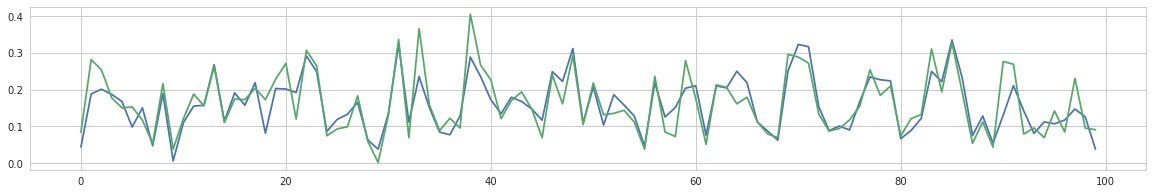

In [117]:
index = 300
plt.plot(pred[index:index+100])
plt.plot(y_test[index:index+100])

In [118]:
np.max(pred)

0.4235992431640625

### sklearn dnn

In [119]:
from sklearn.neural_network import MLPRegressor

In [120]:
mlpr = MLPRegressor(hidden_layer_sizes=(100, 5))

In [121]:
mlpr.fit(X_train,y_train.reshape(len(y_train),))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [122]:
print("RMSE: %.2f"% math.sqrt(np.mean(( minmax_y.inverse_transform(mlpr.predict(X_test)) - minmax_y.inverse_transform(y_test)) ** 2)))

RMSE: 16.80


/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### keras dnn model

In [123]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam, SGD

In [141]:
# define base model
def baseline_model():
    visible = Input(shape=(1030,))
    hidden1 = Dense(512, activation='relu')(visible)
    hidden1 = Dense(256, activation='relu')(hidden1)
    hidden1 = Dense(128, activation='relu')(hidden1)
    hidden1 = Dense(64, activation='relu')(hidden1)
    hidden1 = Dense(32, activation='relu')(hidden1)
    hidden1 = Dense(16, activation='relu')(hidden1)
    output = Dense(1, activation='tanh')(hidden1)
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #sgd = SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
    model = Model(inputs=visible, outputs=output)
    model.compile(optimizer=adam,loss='mean_squared_error',)
    model.summary()
    
    return model

In [142]:
dnn = baseline_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1030)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               527872    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
__________

In [165]:
dnn.fit(x=X_train,y=y_train,batch_size=1000,epochs=1)

Epoch 1/1
16008/16008 [==============================] - 1s 59us/step - loss: 0.0015


In [166]:
print("RMSE: %.2f"% math.sqrt(np.mean(( minmax_y.inverse_transform((dnn.predict(X_train))) - minmax_y.inverse_transform(y_train)) ** 2)))

RMSE: 5.79


In [167]:
print("RMSE: %.2f"% math.sqrt(np.mean((minmax_y.inverse_transform(dnn.predict(X_test)) -  minmax_y.inverse_transform(y_test)) ** 2)))

RMSE: 5.93


In [139]:
pred = dnn.predict(X_test)

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


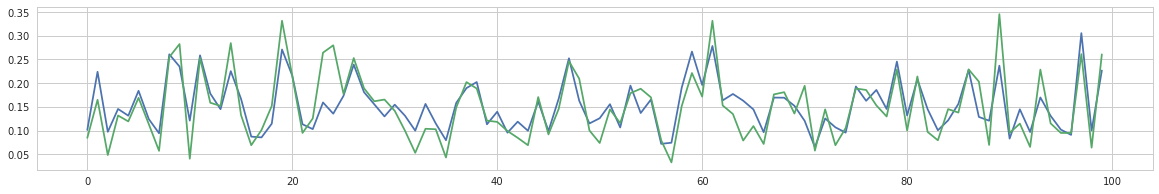

In [140]:
index = 700
plt.plot(pred[index:index+100])
plt.plot(y_test[index:index+100])

### randomforest

In [54]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=100,max_depth=10, n_jobs=4)

In [55]:
%%time
model_rfr.fit(X_train,y_train)

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [ ]:
print("RMSE: %.2f"% math.sqrt(np.mean((minmax_y.inverse_transform(model_rfr.predict(X_test)) - minmax_y.inverse_transform(y_test)) ** 2)))

### xgboost

In [62]:
import xgboost

In [70]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10, n_job=4)

In [ ]:
%%time
xgb.fit(X_train,y_train)

In [65]:
print("RMSE: %.2f"% math.sqrt(np.mean(((xgb.predict(X_test)) - (y_test)) ** 2)))

RMSE: 16.15


/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


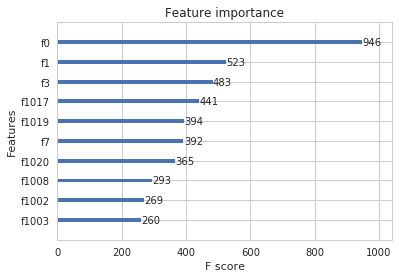

In [69]:
%matplotlib inline 
xgboost.plot_importance(xgb, max_num_features=10)

### svr

In [84]:
from sklearn.svm import LinearSVR

In [85]:
clf = LinearSVR(C=1.0,epsilon=0.2, max_iter=100000,tol=0.000001)
clf.fit(X_train, y_train)

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.2, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
     random_state=None, tol=1e-06, verbose=0)

In [86]:
print("RMSE: %.2f"% math.sqrt(np.mean((clf.predict(X_test) - y_test) ** 2)))

RMSE: 0.13
